In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
sales = pd.read_csv("C:\\Users\\Megha\\Desktop\\DS Assignments\\decision trees\\Company_Data.csv")

In [3]:
sales

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
sales.shape

(400, 11)

In [5]:
sales.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [6]:
sales.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [7]:
sales['Sales'] = sales['Sales'].astype('int64')

In [8]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Sales        400 non-null    int64 
 1   CompPrice    400 non-null    int64 
 2   Income       400 non-null    int64 
 3   Advertising  400 non-null    int64 
 4   Population   400 non-null    int64 
 5   Price        400 non-null    int64 
 6   ShelveLoc    400 non-null    object
 7   Age          400 non-null    int64 
 8   Education    400 non-null    int64 
 9   Urban        400 non-null    object
 10  US           400 non-null    object
dtypes: int64(8), object(3)
memory usage: 34.5+ KB


In [9]:
#no null values

In [10]:
sales.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,6.987500,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.837688,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.000000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.000000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.000000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.000000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [11]:
#dosent seem like there are many outliers

In [12]:
sales[sales['Sales']>10]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
1,11,111,48,16,260,83,Good,65,10,Yes,Yes
7,11,136,81,15,425,120,Good,67,10,Yes,Yes
11,11,117,94,4,503,94,Good,50,13,Yes,Yes
14,11,107,117,11,148,118,Good,52,18,Yes,Yes
17,12,147,74,13,251,131,Good,52,10,Yes,Yes
18,13,110,110,0,408,68,Good,46,17,No,Yes
21,12,134,29,12,239,109,Good,62,18,No,Yes
25,14,139,32,0,176,82,Good,54,11,No,No
30,13,125,94,0,447,89,Good,30,12,Yes,No
35,11,131,84,11,29,96,Medium,44,17,No,Yes


In [13]:
sales[sales['Sales']<10]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9,138,73,11,276,120,Bad,42,17,Yes,Yes
3,7,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4,141,64,3,340,128,Bad,38,13,Yes,No
6,6,115,105,0,45,108,Medium,71,15,Yes,No
8,6,132,110,0,108,124,Medium,76,10,No,No
...,...,...,...,...,...,...,...,...,...,...,...
394,5,130,58,19,366,139,Bad,33,16,Yes,Yes
396,6,139,23,3,37,120,Medium,55,11,No,Yes
397,7,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5,100,79,7,284,95,Bad,50,12,Yes,Yes


In [14]:
sales['Sales'].mean()

6.9875

In [15]:
sales[sales['Sales'] > 7.5]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11,111,48,16,260,83,Good,65,10,Yes,Yes
2,10,113,35,10,269,80,Medium,59,12,Yes,Yes
5,10,124,113,13,501,72,Bad,78,16,No,Yes
7,11,136,81,15,425,120,Good,67,10,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...
387,8,142,73,14,238,115,Medium,73,14,No,Yes
388,8,135,89,11,245,78,Bad,79,16,Yes,Yes
389,8,128,42,8,328,107,Medium,35,12,Yes,Yes
395,12,138,108,17,203,128,Good,33,14,Yes,Yes


In [16]:
sales[sales['Sales'] < 7.5]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
3,7,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4,141,64,3,340,128,Bad,38,13,Yes,No
6,6,115,105,0,45,108,Medium,71,15,Yes,No
8,6,132,110,0,108,124,Medium,76,10,No,No
9,4,132,113,0,131,124,Medium,76,17,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...
393,5,109,51,10,26,120,Medium,30,17,No,Yes
394,5,130,58,19,366,139,Bad,33,16,Yes,Yes
396,6,139,23,3,37,120,Medium,55,11,No,Yes
397,7,162,26,12,368,159,Medium,40,18,Yes,Yes


In [17]:
sales['Sales'] = sales['Sales'].apply(lambda x: 'high' if x > 7.5 else 'low')

In [18]:
sales.head(10)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,high,138,73,11,276,120,Bad,42,17,Yes,Yes
1,high,111,48,16,260,83,Good,65,10,Yes,Yes
2,high,113,35,10,269,80,Medium,59,12,Yes,Yes
3,low,117,100,4,466,97,Medium,55,14,Yes,Yes
4,low,141,64,3,340,128,Bad,38,13,Yes,No
5,high,124,113,13,501,72,Bad,78,16,No,Yes
6,low,115,105,0,45,108,Medium,71,15,Yes,No
7,high,136,81,15,425,120,Good,67,10,Yes,Yes
8,low,132,110,0,108,124,Medium,76,10,No,No
9,low,132,113,0,131,124,Medium,76,17,No,Yes


In [19]:
sales['Sales'].value_counts()

low     236
high    164
Name: Sales, dtype: int64

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
lc = LabelEncoder()

In [22]:
sales['Sales'] = lc.fit_transform(sales['Sales'])

In [23]:
sales['Urban'] = lc.fit_transform(sales['Urban'])

In [24]:
sales['US'] = lc.fit_transform(sales['US'])

In [25]:
sales['ShelveLoc'] = lc.fit_transform(sales['ShelveLoc'])

In [26]:
sales

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0,138,73,11,276,120,0,42,17,1,1
1,0,111,48,16,260,83,1,65,10,1,1
2,0,113,35,10,269,80,2,59,12,1,1
3,1,117,100,4,466,97,2,55,14,1,1
4,1,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,0,138,108,17,203,128,1,33,14,1,1
396,1,139,23,3,37,120,2,55,11,0,1
397,1,162,26,12,368,159,2,40,18,1,1
398,1,100,79,7,284,95,0,50,12,1,1


In [27]:
sales.drop('Education' , axis  =1 ,inplace = True)

In [28]:
sales.shape

(400, 10)

C:\Users\Megha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

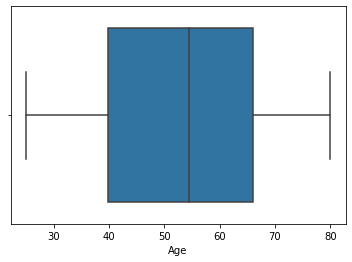

In [29]:
sns.boxplot(sales['Age'])

C:\Users\Megha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

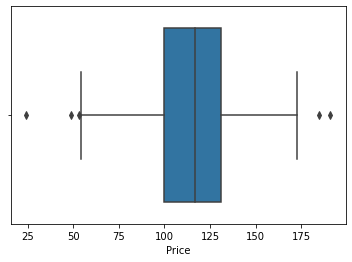

In [30]:
sns.boxplot(sales['Price'])

C:\Users\Megha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Population'>

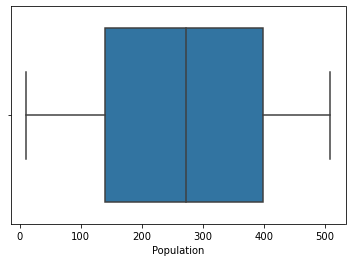

In [31]:
sns.boxplot(sales['Population'])

C:\Users\Megha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Advertising'>

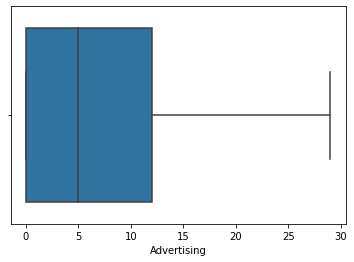

In [32]:
sns.boxplot(sales['Advertising'])

C:\Users\Megha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CompPrice'>

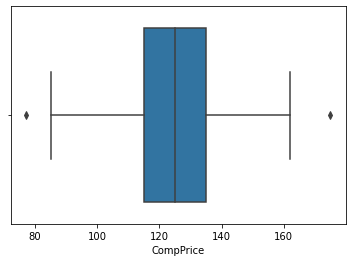

In [33]:
sns.boxplot(sales['CompPrice'])

C:\Users\Megha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income'>

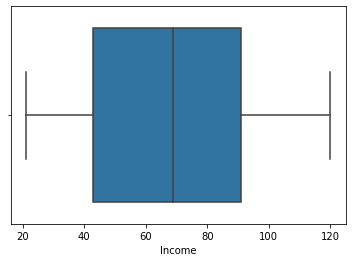

In [34]:
sns.boxplot(sales['Income'])

<AxesSubplot:>

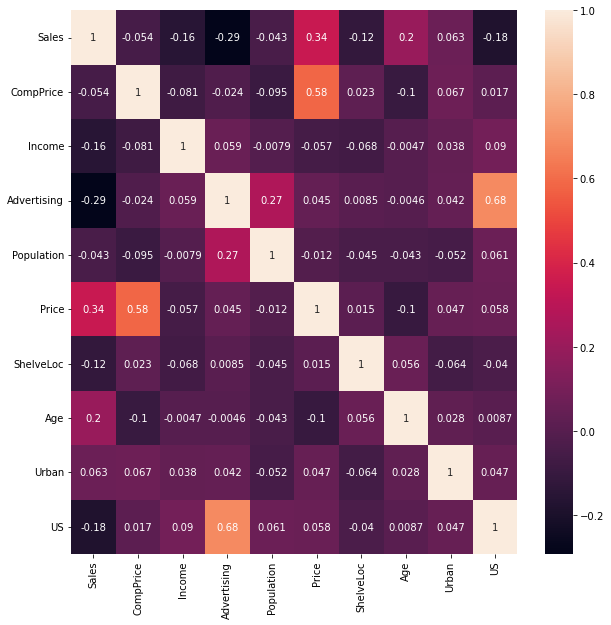

In [35]:
plt.figure(figsize = (10,10))
sns.heatmap(sales.corr() , annot = True )

In [36]:
#sales highly dependant on  advertising and Price
#Sales depends least on competetors price

In [37]:
x = sales.iloc[:,1:]

In [38]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Urban,US
0,138,73,11,276,120,0,42,1,1
1,111,48,16,260,83,1,65,1,1
2,113,35,10,269,80,2,59,1,1
3,117,100,4,466,97,2,55,1,1
4,141,64,3,340,128,0,38,1,0
...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,1,1
396,139,23,3,37,120,2,55,0,1
397,162,26,12,368,159,2,40,1,1
398,100,79,7,284,95,0,50,1,1


In [39]:
y = sales['Sales']

In [40]:
y

0      0
1      0
2      0
3      1
4      1
      ..
395    0
396    1
397    1
398    1
399    0
Name: Sales, Length: 400, dtype: int32

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.8,random_state=42)

In [43]:
x_train.shape

(320, 9)

In [44]:
x_test.shape

(80, 9)

In [130]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [46]:
dtree = DecisionTreeClassifier(random_state =0)

In [47]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [48]:
dtree.score(x_train,y_train)

1.0

[Text(238.134779676259, 784.0384615384615, 'X[4] <= 92.5\ngini = 0.479\nsamples = 320\nvalue = [127, 193]'),
 Text(72.2589928057554, 721.3153846153846, 'X[5] <= 0.5\ngini = 0.292\nsamples = 45\nvalue = [37, 8]'),
 Text(36.1294964028777, 658.5923076923077, 'X[2] <= 9.5\ngini = 0.5\nsamples = 12\nvalue = [6, 6]'),
 Text(24.086330935251798, 595.8692307692307, 'X[0] <= 118.5\ngini = 0.375\nsamples = 8\nvalue = [2, 6]'),
 Text(12.043165467625899, 533.1461538461538, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(36.1294964028777, 533.1461538461538, 'X[6] <= 42.0\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(24.086330935251798, 470.4230769230769, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(48.172661870503596, 470.4230769230769, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(48.172661870503596, 595.8692307692307, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(108.38848920863309, 658.5923076923077, 'X[0] <= 101.0\ngini = 0.114\nsamples = 33\nvalue = [31, 2]'),
 Text(96.3453

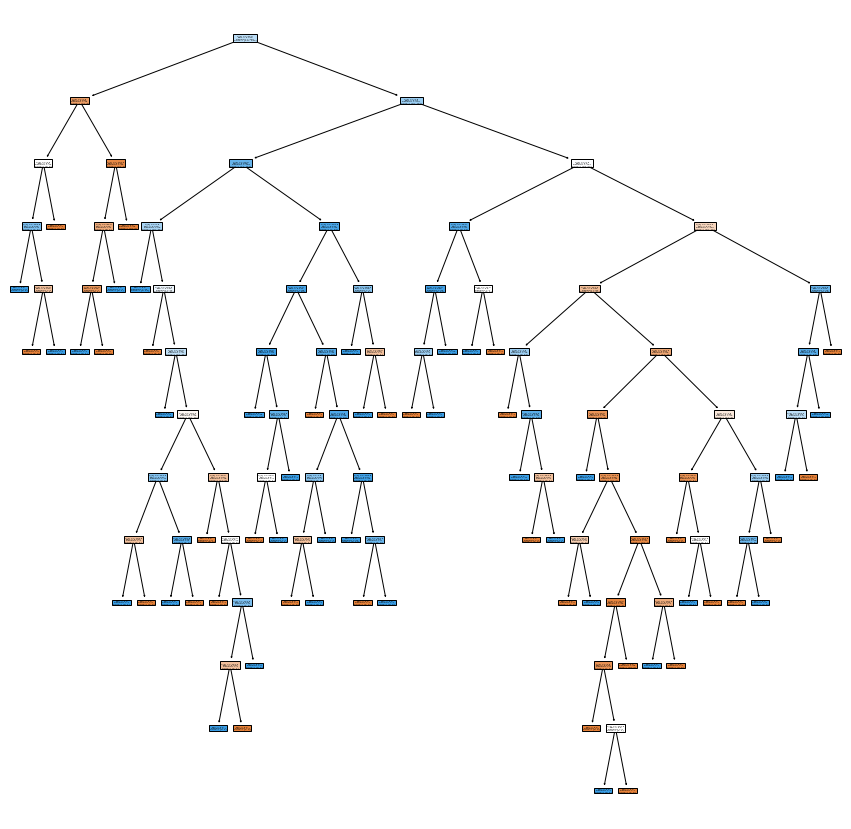

In [49]:
plt.figure(figsize = (15,15))

tree.plot_tree(dtree,filled=True)

In [50]:
pred = dtree.predict(x_test)

In [51]:
accuracy_score(pred,y_test)

0.725

# overfitting problem is observed

In [52]:
path = dtree.cost_complexity_pruning_path(x_train,y_train)

In [53]:
path

{'ccp_alphas': array([0.        , 0.0020202 , 0.00204248, 0.00273437, 0.00288186,
        0.00298913, 0.00300481, 0.00345494, 0.00366981, 0.00391414,
        0.00416667, 0.00416667, 0.00416667, 0.00416667, 0.00473485,
        0.00507813, 0.00520833, 0.00520833, 0.0053442 , 0.00654762,
        0.00692812, 0.00741575, 0.00833333, 0.00880208, 0.00889699,
        0.009375  , 0.01010878, 0.01061869, 0.01428571, 0.01488095,
        0.01706575, 0.01718619, 0.0202567 , 0.03175853, 0.04201937,
        0.05921027]),
 'impurities': array([0.        , 0.00606061, 0.01218806, 0.01765681, 0.02342053,
        0.02939879, 0.0354084 , 0.0526831 , 0.06369253, 0.07543496,
        0.07960162, 0.08376829, 0.08793496, 0.09210162, 0.10157132,
        0.11680569, 0.12201403, 0.12722236, 0.13791077, 0.14445839,
        0.16524276, 0.18749001, 0.20415668, 0.21295876, 0.22185575,
        0.23123075, 0.25144832, 0.26206701, 0.27635272, 0.29123367,
        0.30829942, 0.32548561, 0.3457423 , 0.37750083, 0.4195202 

In [54]:
ca = path.ccp_alphas

In [55]:
ca

array([0.        , 0.0020202 , 0.00204248, 0.00273437, 0.00288186,
       0.00298913, 0.00300481, 0.00345494, 0.00366981, 0.00391414,
       0.00416667, 0.00416667, 0.00416667, 0.00416667, 0.00473485,
       0.00507813, 0.00520833, 0.00520833, 0.0053442 , 0.00654762,
       0.00692812, 0.00741575, 0.00833333, 0.00880208, 0.00889699,
       0.009375  , 0.01010878, 0.01061869, 0.01428571, 0.01488095,
       0.01706575, 0.01718619, 0.0202567 , 0.03175853, 0.04201937,
       0.05921027])

In [56]:
lista = []

for i in ca:
    tree = DecisionTreeClassifier(ccp_alpha = i)
    tree.fit(x_train,y_train)
    pred = tree.predict(x_test)
    lista.append(accuracy_score(y_test,pred))  

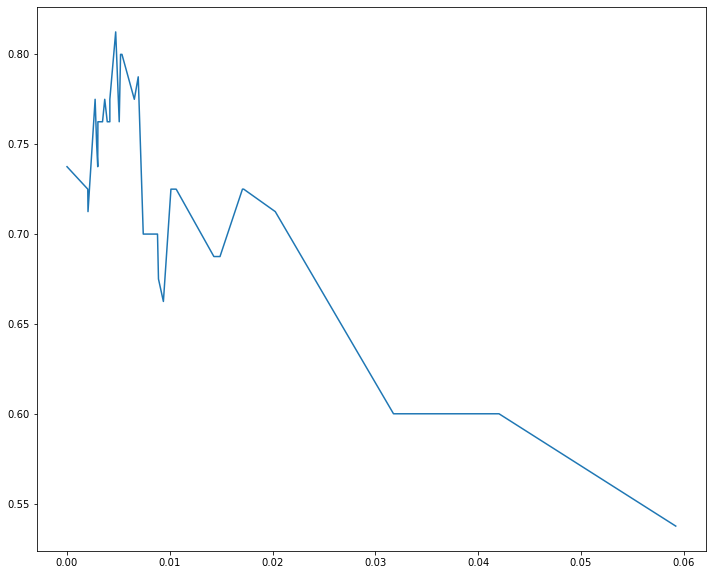

In [59]:
plt.figure(figsize = (12,10))
plt.plot(ca,lista)

In [61]:
dtree = DecisionTreeClassifier(ccp_alpha = 0.005, random_state = 0)
dtree.fit(x_train,y_train)
pred = dtree.predict(x_test)
accuracy_score(y_test,pred)

0.7625

In [142]:
dtree = DecisionTreeClassifier(ccp_alpha = 0.005, random_state = 0 , max_depth = 8)
dtree.fit(x_train,y_train)
pred = dtree.predict(x_test)
accuracy_score(y_test,pred)

0.7875

In [141]:
dtree1 = DecisionTreeClassifier(ccp_alpha = 0.005, random_state = 0 , max_depth = 8 , criterion = 'entropy')
dtree1.fit(x_train,y_train)
pred = dtree1.predict(x_test)
accuracy_score(y_test,pred)


0.7375

# final decision tree 

In [176]:
tree2 = DecisionTreeClassifier(ccp_alpha = 0.005 , max_depth = 8)
tree2.fit(x_train,y_train)
pred = tree2.predict(x_test)
accuracy_score(y_test,pred) 

0.8125

[Text(211.26201923076923, 770.1, 'X[4] <= 92.5\ngini = 0.479\nsamples = 320\nvalue = [127, 193]'),
 Text(96.57692307692308, 679.5, 'X[5] <= 0.5\ngini = 0.292\nsamples = 45\nvalue = [37, 8]'),
 Text(64.38461538461539, 588.9, 'X[1] <= 57.0\ngini = 0.5\nsamples = 12\nvalue = [6, 6]'),
 Text(32.19230769230769, 498.3, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(96.57692307692308, 498.3, 'gini = 0.375\nsamples = 8\nvalue = [6, 2]'),
 Text(128.76923076923077, 588.9, 'gini = 0.114\nsamples = 33\nvalue = [31, 2]'),
 Text(325.9471153846154, 679.5, 'X[2] <= 6.5\ngini = 0.44\nsamples = 275\nvalue = [90, 185]'),
 Text(193.15384615384616, 588.9, 'X[6] <= 50.5\ngini = 0.298\nsamples = 148\nvalue = [27, 121]'),
 Text(160.96153846153845, 498.3, 'X[5] <= 0.5\ngini = 0.459\nsamples = 56\nvalue = [20, 36]'),
 Text(128.76923076923077, 407.7, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(193.15384615384616, 407.7, 'X[4] <= 103.5\ngini = 0.499\nsamples = 42\nvalue = [20, 22]'),
 Text(160.96153846

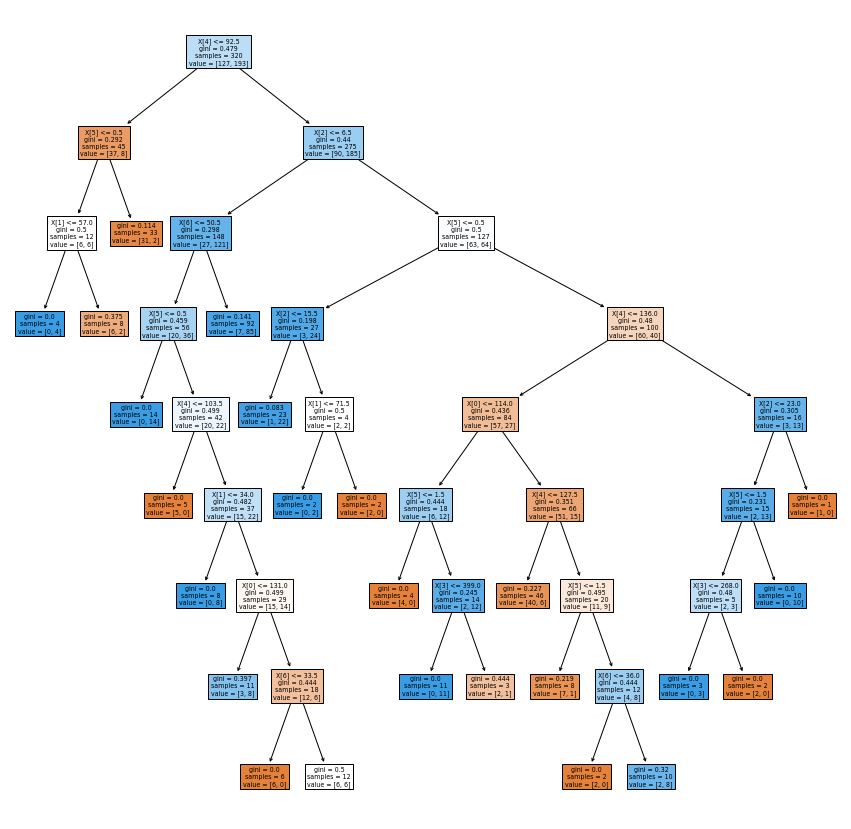

In [177]:
plt.figure(figsize = (15,15))

tree.plot_tree(tree2,filled=True)

# Price was taken as the first criteria based on which the first split was made 